# Imports

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
from tensorflow.math import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')
%matplotlib inline
np.random.seed(0)

# Data

In [2]:
(training_data, training_labels), (test_data, test_labels) = mnist.load_data()
training_data, test_data = training_data / 255, test_data / 255

In [3]:
print(training_data.shape, training_labels.shape)
print(test_data.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualize Examples

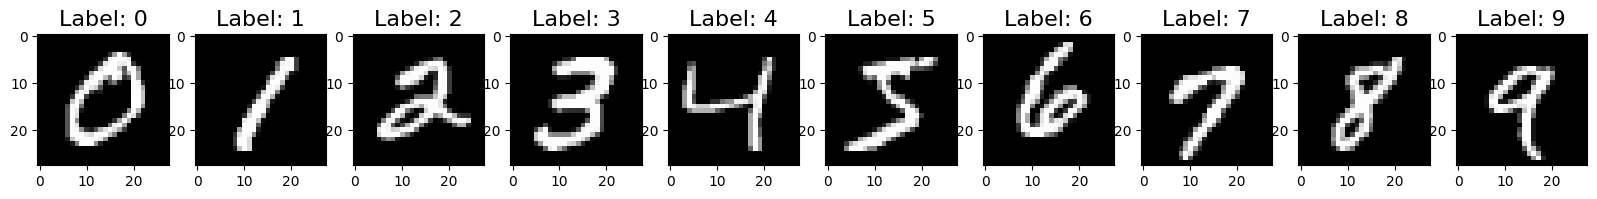

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = training_data[training_labels == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

# Create Model - Fully Connected Neural Network

In [45]:
model = Sequential()

# model.add(Flatten(input_shape=(28,28,1)))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(10, activation='softmax'))


model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))



model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_5 (Flatten)         (None, 9216)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               1179776   
                                                     

# Train

In [46]:
callback_es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

model_log = model.fit(training_data, training_labels, epochs=10, batch_size=128, validation_split=.3, callbacks=[callback_es])#validation_data=(test_data, test_labels))

Epoch 1/10
  1/329 [..............................] - ETA: 2:00 - loss: 2.3211 - accuracy: 0.1172

2022-08-25 16:48:00.674155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - ETA: 0s - loss: 0.2828 - accuracy: 0.9154

2022-08-25 16:48:05.013472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - 6s 16ms/step - loss: 0.2828 - accuracy: 0.9154 - val_loss: 0.0728 - val_accuracy: 0.9787
Epoch 2/10
329/329 [==============================] - 5s 15ms/step - loss: 0.0848 - accuracy: 0.9744 - val_loss: 0.0577 - val_accuracy: 0.9833
Epoch 3/10
329/329 [==============================] - 5s 14ms/step - loss: 0.0602 - accuracy: 0.9821 - val_loss: 0.0475 - val_accuracy: 0.9862
Epoch 4/10
329/329 [==============================] - 5s 15ms/step - loss: 0.0500 - accuracy: 0.9842 - val_loss: 0.0450 - val_accuracy: 0.9872
Epoch 5/10
329/329 [==============================] - 5s 14ms/step - loss: 0.0396 - accuracy: 0.9874 - val_loss: 0.0475 - val_accuracy: 0.9859
Epoch 6/10
329/329 [==============================] - 5s 15ms/step - loss: 0.0362 - accuracy: 0.9885 - val_loss: 0.0482 - val_accuracy: 0.9873
Epoch 7/10
329/329 [==============================] - 5s 15ms/step - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.0420 - val_accuracy: 0.9889
Epoch 8/10

# Evaluate

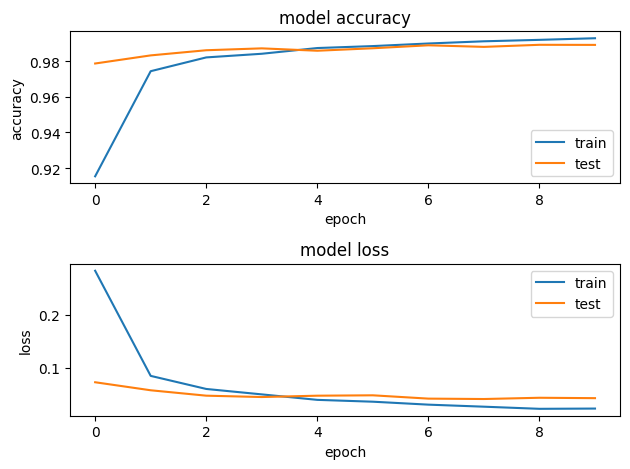

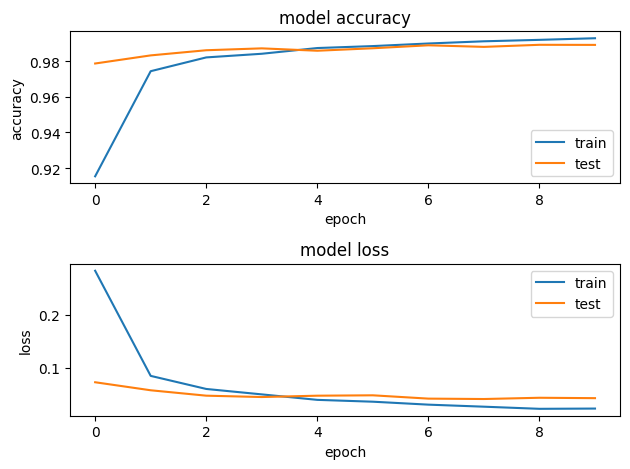

In [47]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

In [48]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 2s 6ms/step - loss: 0.0323 - accuracy: 0.9902
Test Loss: 0.03229186311364174, Test Accuracy: 0.9902000427246094


In [49]:
predictions = model.predict(test_data)
np.set_printoptions(suppress=True)

for i in range(10):
    print(f'True: {test_labels[i]}\tPred: {np.argmax(predictions[i])}\n')


 65/313 [=====>........................] - ETA: 0s

2022-08-25 16:48:56.313622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
True: 7	Pred: 7

True: 2	Pred: 2

True: 1	Pred: 1

True: 0	Pred: 0

True: 4	Pred: 4

True: 1	Pred: 1

True: 4	Pred: 4

True: 9	Pred: 9

True: 5	Pred: 5

True: 9	Pred: 9



1/1 [==============================] - 0s 12ms/step


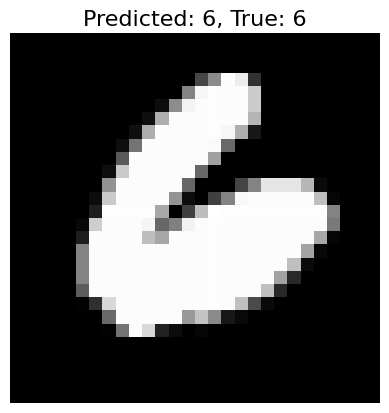

In [58]:
random_idx = np.random.choice(len(test_data))
x_sample = test_data[random_idx]
y_sample_true = test_labels[random_idx]
y_guess = np.argmax(model.predict(tf.expand_dims(x_sample,0)), axis=1)

plt.title("Predicted: {}, True: {}".format(y_guess[0], y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')
plt.axis(False);

# Confusion Matrix

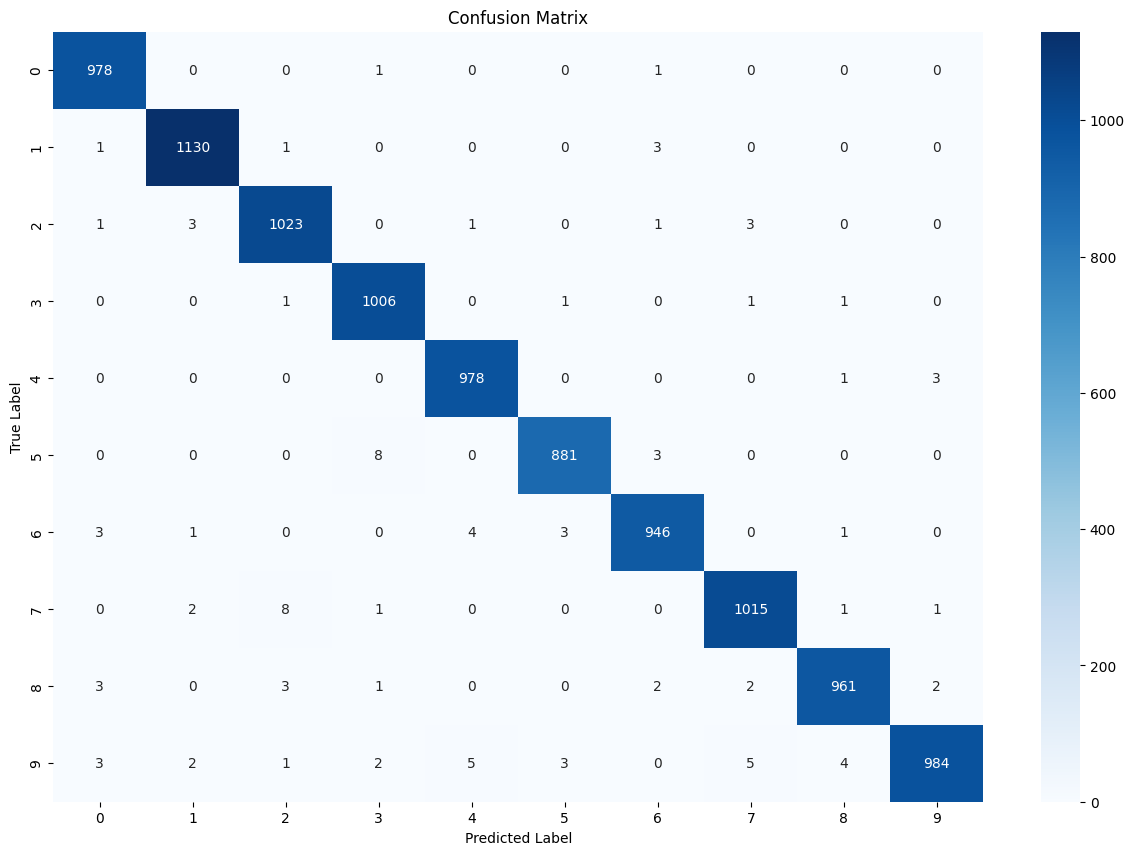

In [52]:
confusion_mtx = confusion_matrix(test_labels, np.argmax(predictions, axis=1))

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Save Model

In [53]:
model_path = 'models'
model_name = 'mnist_model.h5'
os.makedirs(model_path, exist_ok=True)

model.save(f'{model_path}/{model_name}')

In [54]:
pb_model_name = "frozen_mnist_model.pb"
tf_model = model

# get model TF graph
tf_model_graph = tf.function(lambda x: tf_model(x))

# get concrete function
tf_model_graph = tf_model_graph.get_concrete_function(
    tf.TensorSpec(tf_model.inputs[0].shape, tf_model.inputs[0].dtype)
)

# obtain frozen concrete function
frozen_tf_func = convert_variables_to_constants_v2(tf_model_graph)

# get frozen graph
frozen_tf_func.graph.as_graph_def()

# save full tf model
tf.io.write_graph(
    graph_or_graph_def=frozen_tf_func.graph,
    logdir=model_path,
    name=pb_model_name,
    as_text=False,
)

tf.io.write_graph(
    graph_or_graph_def=frozen_tf_func.graph,
    logdir=model_path,
    name=pb_model_name + 'txt',
    as_text=True,
)

2022-08-25 16:49:35.560525: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-08-25 16:49:35.560605: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2022-08-25 16:49:35.560822: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-25 16:49:35.560840: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


'models/frozen_mnist_model.pbtxt'